> **Main References:** : [C4_W4_Lab1_LSTM.ipynb - Coursera](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C4/W4/ungraded_labs/C4_W4_Lab_1_LSTM.ipynb)

## Import Libraries

In [352]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math

# Visualization
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from datetime import datetime

## Dataset Information

In [353]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [354]:
# Load Dataset
dataset_df = pd.read_csv('/content/drive/MyDrive/Bangkit/Dataset/allDataset.csv', header=0, index_col=0, parse_dates=True)
dataset_df

,Tanggal,Bayam,Kangkung,Sawi,Brokoli,Kubis,Wortel,Kentang,Kacang Polong,Kacang Tanah,...,Garu Piring,Lada,Cengkeh,Kayu Manis,Kapulaga,Kunyit,Ubi Jalar,Ubi Kayu,Singkong,Talas
Index,,,,,,,,,,,,,,,,,,,,,
1,1/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
2,8/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
3,15/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
4,22/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
5,29/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,27/10/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500
567,3/11/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500
568,10/11/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500


In [356]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 1 to 570
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tanggal               570 non-null    object
 1   Bayam                 570 non-null    int64 
 2   Kangkung              570 non-null    int64 
 3   Sawi                  570 non-null    int64 
 4   Brokoli               570 non-null    int64 
 5   Kubis                 570 non-null    int64 
 6   Wortel                570 non-null    int64 
 7   Kentang               570 non-null    int64 
 8   Kacang Polong         570 non-null    int64 
 9   Kacang Tanah          570 non-null    int64 
 10  Buncis                570 non-null    int64 
 11  Labu Siam             570 non-null    int64 
 12  Labu Kuning           570 non-null    int64 
 13  Lobak Merah           570 non-null    int64 
 14  Lobak Putih           570 non-null    int64 
 15  Tomat                 570 non-null    in

In [357]:
dataset_df.describe()

,Bayam,Kangkung,Sawi,Brokoli,Kubis,Wortel,Kentang,Kacang Polong,Kacang Tanah,Buncis,...,Garu Piring,Lada,Cengkeh,Kayu Manis,Kapulaga,Kunyit,Ubi Jalar,Ubi Kayu,Singkong,Talas
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,8426.315789,8576.315789,7397.368421,20729.824561,8507.017544,12185.087719,11696.491228,44472.807018,26741.228070,26001.754386,...,6457.017544,115617.543860,129942.105263,19760.526316,96923.684211,6608.771930,6815.789474,4424.561404,1783.333333,16575.438596
std,4198.795807,3803.598856,3485.028500,9032.444253,3806.033488,2690.288218,4191.168425,9675.293169,1325.418089,5685.132809,...,1221.653587,17137.745706,41711.855531,2988.131721,10574.651379,1805.214153,2178.000685,1172.140083,521.912912,2872.283202
min,1500.000000,1000.000000,3000.000000,9000.000000,3000.000000,8000.000000,6000.000000,30000.000000,24000.000000,15000.000000,...,5000.000000,89000.000000,85000.000000,15000.000000,82000.000000,3500.000000,3000.000000,2500.000000,1000.000000,12000.000000
25%,4000.000000,4500.000000,5000.000000,14000.000000,5000.000000,10000.000000,8000.000000,35000.000000,26000.000000,20000.000000,...,5000.000000,98000.000000,99500.000000,17000.000000,88500.000000,5500.000000,5000.000000,3500.000000,1500.000000,14000.000000
50%,10000.000000,10000.000000,6000.000000,17500.000000,8000.000000,11500.000000,10500.000000,44500.000000,27000.000000,28000.000000,...,6000.000000,125000.000000,115000.000000,19500.000000,94000.000000,6500.000000,7000.000000,4000.000000,1500.000000,16000.000000
75%,12000.000000,11875.000000,8500.000000,30000.000000,12500.000000,14500.000000,15500.000000,55000.000000,28000.000000,30000.000000,...,7000.000000,127000.000000,178000.000000,21500.000000,107000.000000,7500.000000,8500.000000,5500.000000,2000.000000,18500.000000
max,14500.000000,13500.000000,20000.000000,38000.000000,15000.000000,18000.000000,20000.000000,60000.000000,30000.000000,35000.000000,...,9000.000000,149000.000000,210000.000000,25000.000000,116000.000000,10000.000000,10000.000000,6500.000000,3000.000000,24500.000000


In [358]:
# Check count of NaN in every column
# Reference: https://stackoverflow.com/a/57141046
dataset_df.isna().sum()

Tanggal                 0
Bayam                   0
Kangkung                0
Sawi                    0
Brokoli                 0
Kubis                   0
Wortel                  0
Kentang                 0
Kacang Polong           0
Kacang Tanah            0
Buncis                  0
Labu Siam               0
Labu Kuning             0
Lobak Merah             0
Lobak Putih             0
Tomat                   0
Terong                  0
Paprika Hijau           0
Paprika Kuning          0
Paprika Merah           0
Bawang Bombay           0
Bawang Putih            0
Bawang Merah            0
Cabai Keriting Merah    0
Cabai Keriting Hijau    0
Cabai Rawit Hijau       0
Cabai Rawit Merah       0
Cabai Rawit Kering      0
Mentimun                0
Pare Paria              0
Jamur                   0
Kembang Kol             0
Daun Bawang             0
Kemangi                 0
Selada                  0
Seledri                 0
Benih Kacang Panjang    0
Benih Kangkung          0
Benih Jagung

In [359]:
temp_dataset = dataset_df
temp_dataset

,Tanggal,Bayam,Kangkung,Sawi,Brokoli,Kubis,Wortel,Kentang,Kacang Polong,Kacang Tanah,...,Garu Piring,Lada,Cengkeh,Kayu Manis,Kapulaga,Kunyit,Ubi Jalar,Ubi Kayu,Singkong,Talas
Index,,,,,,,,,,,,,,,,,,,,,
1,1/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
2,8/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
3,15/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
4,22/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
5,29/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,27/10/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500
567,3/11/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500
568,10/11/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500


## Data Visualization (Series Data `Harga`)

In [640]:
# Remove not usefull columns
# Reference: https://stackoverflow.com/a/53214704
nama_product = "Tomat"
dataset_df = temp_dataset.filter([nama_product])
dataset_df

,Tomat
Index,
1,15000
2,14000
3,14000
4,14000
5,14000
...,...
566,15500
567,15500
568,15500


In [641]:
print("Total rows: ", len(dataset_df))

Total rows:  570


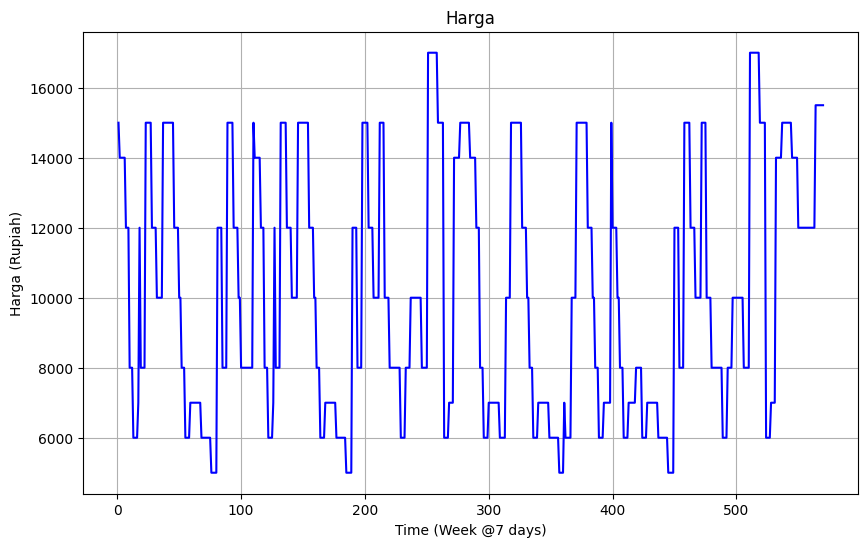

In [642]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_df.index.values.tolist(), dataset_df[nama_product], color='blue')
plt.title('Harga')
plt.xlabel('Time (Week @7 days)')
plt.ylabel('Harga (Rupiah)')
plt.grid(True)

## Data Preprocessing (Univariate)

In [643]:
# Defines the rolling window
def windowed_dataset_univariate(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.shuffle(shuffle_buffer)
    return ds.batch(batch_size).prefetch(1)

In [644]:
series = np.array(dataset_df[nama_product].values)
time = dataset_df.index.values.tolist()

# Normalization data
min_series = np.min(series)
max_series = np.max(series)
series = series - min_series
series = series / max_series

In [645]:
# Train:Validation = 80:20
split_series = math.ceil(0.8 * len(series))

x_train = series[:split_series]
time_train = time[:split_series]
x_val = series[split_series:]
time_val = time[split_series:]
print("Train :", len(x_train))
print("Val :", len(x_val))

Train : 456
Val : 114


In [646]:
print(split_series)

456


In [647]:
# Hyperparameter
window_size = 8
batch_size = 8
shuffle_buffer_size = 256

In [648]:
train_set = windowed_dataset_univariate(
    series=x_train,
    window_size=window_size,
    batch_size=batch_size,
    shuffle_buffer=shuffle_buffer_size
)
val_set = windowed_dataset_univariate(
    series=x_val,
    window_size=window_size,
    batch_size=batch_size,
    shuffle_buffer=shuffle_buffer_size
)
# Check result
print(list(train_set.take(1).as_numpy_iterator()))
print(x_train.shape)

[(array([[[0.58823529],
        [0.58823529],
        [0.29411765],
        [0.29411765],
        [0.29411765],
        [0.29411765],
        [0.17647059],
        [0.17647059]],

       [[0.29411765],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.58823529]],

       [[0.70588235],
        [0.70588235],
        [0.70588235],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.58823529]],

       [[0.17647059],
        [0.05882353],
        [0.05882353],
        [0.05882353],
        [0.05882353],
        [0.17647059],
        [0.17647059],
        [0.17647059]],

       [[0.58823529],
        [0.58823529],
        [0.41176471],
        [0.41176471],
        [0.41176471],
        [0.41176471],
        [0.29411765],
        [0.29411765]],

       [[0.41176471],
        [0.41176471],
        [0.41176471],
        [0.17647059],
        [0.17647059]

## Modelling with LSTM Layers (Univariate)

In [649]:
model = tf.keras.models.Sequential()
# CNN 1D
model.add(tf.keras.layers.Conv1D(
    filters=32,
    kernel_size=5,
    strides=1,
    padding='causal',
    activation='relu',
    input_shape=[window_size, 1]
))

# LSTM
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.LSTM(32, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.25))

# DNN
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 8, 32)             192       
                                                                 
 lstm_57 (LSTM)              (None, 8, 64)             24832     
                                                                 
 dropout_57 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_58 (LSTM)              (None, 8, 64)             33024     
                                                                 
 dropout_58 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_59 (LSTM)              (None, 8, 32)             12416     
                                                                 
 dropout_59 (Dropout)        (None, 8, 32)           

In [650]:
# Define optimizer using learning_rate
opt = tf.keras.optimizers.RMSprop(
    learning_rate=1e-4,
    momentum=0.9
)

In [651]:
model.compile(
    loss='mse',
    optimizer=opt,
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Training Model (Univariate)

In [652]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=7)

In [653]:
history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[callback_es],
    verbose=1
)

Epoch 1/500
56/56 [==============================] - 8s 42ms/step - loss: 0.0633 - root_mean_squared_error: 0.2516 - val_loss: 0.0715 - val_root_mean_squared_error: 0.2674
Epoch 2/500
56/56 [==============================] - 1s 24ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072 - val_loss: 0.0512 - val_root_mean_squared_error: 0.2263
Epoch 3/500
56/56 [==============================] - 1s 25ms/step - loss: 0.0390 - root_mean_squared_error: 0.1975 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2435
Epoch 4/500
56/56 [==============================] - 1s 16ms/step - loss: 0.0391 - root_mean_squared_error: 0.1979 - val_loss: 0.0464 - val_root_mean_squared_error: 0.2154
Epoch 5/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0377 - root_mean_squared_error: 0.1941 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2103
Epoch 6/500
56/56 [==============================] - 1s 18ms/step - loss: 0.0364 - root_mean_squared_error: 0.1908 - val_loss: 0.0471 - val_

## Plot Accuracy and Lose (Univariate)

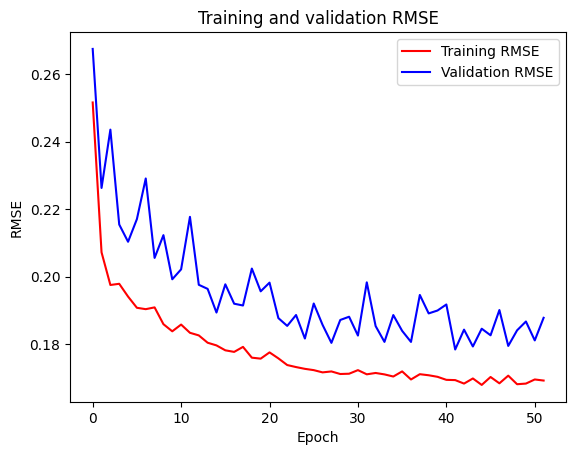

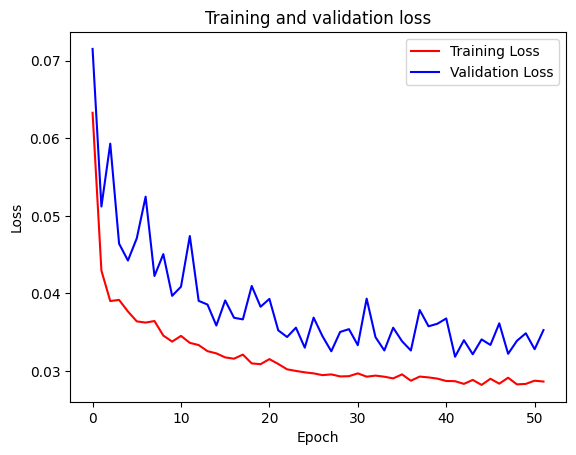

In [654]:
root_mean_squared_error = history.history['root_mean_squared_error']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(root_mean_squared_error))

# Plot training and validation accuracy per epoch
plt.plot(epochs, root_mean_squared_error, 'r', label="Training RMSE")
plt.plot(epochs, val_root_mean_squared_error, 'b', label="Validation RMSE")
plt.title('Training and validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Evaluate

In [655]:
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(32).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [656]:
def plot_series(time, series_true, series_predict, start=0, end=None):
  plt.plot(time[start:end], series_true[start:end], color='blue', label='Real Harga')
  plt.plot(time[start:end], series_predict[start:end], color='red', label='Predictions')
  plt.title('Feature Harga')
  plt.xlabel('Time (Week @7 days)')
  plt.ylabel('Harga (Rupiah)')
  plt.legend()
  plt.grid(True)

In [657]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
forecast = forecast[split_series - window_size:-1, -1, 0]
# Penjelasan:
# Misalkan data seriesnya ada 100 yaitu [0,1,2,3,...,99]
# data series tersebut akan diproses dengan window (8) dan shift (1) menjadi
# [[0],[1],[2],[3],[4],[5],[6],[7]]
# [[1],[2],[3],dst]
# [[2],[3],[4],dst]
# dst
# Model akan memberikan prediksi
# [[1],[2],[3],[4],[5],[6],[7],[8]]
# [[2],[3],[4],dst]
# [[3],[4],[5],dst]
# Oleh karena itu hasil forecast cukup diambil element terakhir pada hasil prediksi
# untuk bagian split_series - window_size merupakan batas antara prediksi dari data train dan val
# karena prediksi dimulai pada data [0 + 8, 1 + 8, 2 + 8, dst sampai, 91 + 8, 92 + 8]
# ingat bahwa pada prediksi pada window terakhir adalah [[93],[94],[95],[96],[97],[98],[99],[100]]
# sehingga akan muncul prediksi pada data ke-100
# akibatnya untuk komparasi harus dikurangi satu data yaitu si data prediksi ke-100 dengan
# split_series - window_size:-1 (min satu untuk mengecualikan element paling kanan atau data ke-100)
# sedangkan -1, 0 sebelahnya adalah untuk mengambil hasil prediksi pada elemen terakhirnya
# contoh [[2],[3],[4],[5],[6],[7],[8],[9]] hanya akan diambil nilai 9 saja

# Kalau misal merasa aneh kenapa banyak input misal panjangnya 8, sedangkan output prediksinya juga
# punya panjang 8, disisi lain output pada layer terakhir hanya 1, aneh bukan? itu karena format inputnya
# meskipun punya panjang 8 namun mengalaman expansion pada dimensionnnya dari [1,2,3] menjadi [[1],[2],[3]]
# dan model akan mengenalinya sebagai 8 sub input. #mendokseh ^^

18/18 [==============================] - 2s 17ms/step


In [658]:
# invert predictions (inverse normalization)
notnorm_x_val = x_val * max_series + min_series
notnorm_forecast = forecast * max_series + min_series
print(x_val[:2])
print(forecast[:2])

[0.17647059 0.58823529]
[0.14293987 0.16455613]


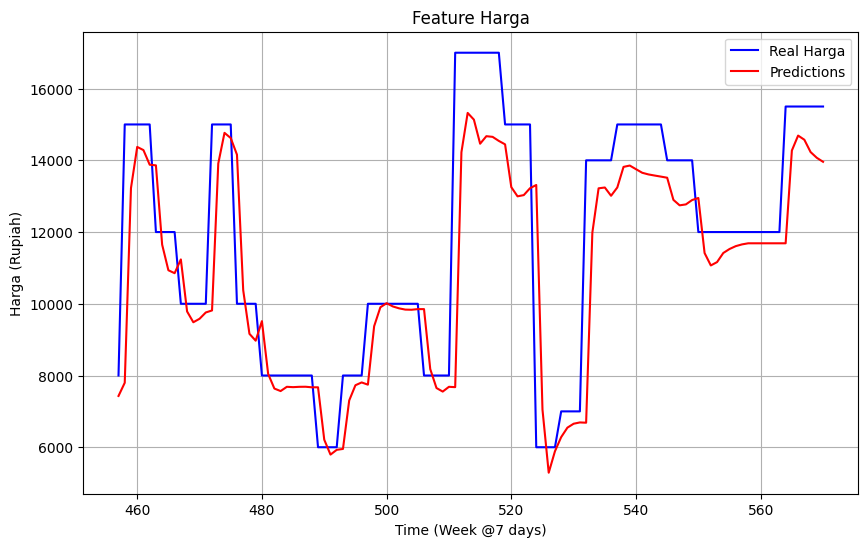

In [659]:
plt.figure(figsize=(10, 6))
plot_series(
    time=time_val,
    series_true=notnorm_x_val,
    series_predict=notnorm_forecast
)

In [660]:
df_compare_forecast = pd.DataFrame(data={"Predictions": notnorm_forecast, "Actuals": notnorm_x_val})
df_compare_forecast

,Predictions,Actuals
0,7429.977539,8000.0
1,7797.454102,15000.0
2,13225.641602,15000.0
3,14373.385742,15000.0
4,14285.094727,15000.0
...,...,...
109,14689.901367,15500.0
110,14573.725586,15500.0
111,14230.406250,15500.0
112,14069.786133,15500.0


In [661]:
score_rmse_with_norm = math.sqrt(mean_squared_error(x_val, forecast))
score_rmse_without_norm = math.sqrt(mean_squared_error(notnorm_x_val, notnorm_forecast))
print("Score RMSE with Normalize Dataset (Validation) :", score_rmse_with_norm)
print("Score RMSE without Normalize Dataset (Validation) :",score_rmse_without_norm)

Score RMSE with Normalize Dataset (Validation) : 0.11513700787368653
Score RMSE without Normalize Dataset (Validation) : 1957.3291288250061


## Test Forecasting

In [662]:
data_path = pd.read_csv('/content/drive/MyDrive/Bangkit/Dataset/allDataset.csv', header=0, index_col=0, parse_dates=True)
data_path

,Tanggal,Bayam,Kangkung,Sawi,Brokoli,Kubis,Wortel,Kentang,Kacang Polong,Kacang Tanah,...,Garu Piring,Lada,Cengkeh,Kayu Manis,Kapulaga,Kunyit,Ubi Jalar,Ubi Kayu,Singkong,Talas
Index,,,,,,,,,,,,,,,,,,,,,
1,1/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
2,8/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
3,15/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
4,22/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
5,29/1/2013,1500,1000,5500,9000,3500,8000,6000,30000,26000,...,5000,89000,130000,17000,83000,3500,3000,4000,1000,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,27/10/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500
567,3/11/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500
568,10/11/2023,14000,13500,7500,35500,14000,16000,15000,58500,30000,...,9000,149000,199000,22500,87000,9000,9500,6000,2000,24500


In [663]:
data_path[["Tanggal", nama_product]].tail(window_size)

,Tanggal,Tomat
Index,,
563,6/10/2023,12000
564,13/10/2023,15500
565,20/10/2023,15500
566,27/10/2023,15500
567,3/11/2023,15500
568,10/11/2023,15500
569,17/11/2023,15500
570,24/11/2023,15500


In [664]:
print("Min Series :",min_series)
print("Max Series :",max_series)

Min Series : 5000
Max Series : 17000


In [666]:
init_value_forecast = [[[12000], [15500], [15500], [15500], [15500], [15500], [15500], [15500]]]
norm_init_value_forecast = (np.array(init_value_forecast) - min_series) / max_series
print(norm_init_value_forecast)

[[[0.41176471]
  [0.61764706]
  [0.61764706]
  [0.61764706]
  [0.61764706]
  [0.61764706]
  [0.61764706]
  [0.61764706]]]


In [667]:
# Don't change this format ya! (based on the data)
LAST_DATE_IN_DATA = "24/11/2023"
init_value_forecasts = [[[12000], [15500], [15500], [15500], [15500], [15500], [15500], [15500]]]
norm_init_value_forecasts = (np.array(init_value_forecasts) - min_series) / max_series


def get_forecast(start_date_target, end_date_target):
    """
    Forecasting the price of Bayam. Note: start and end date target must be after last date

    Args:
        start_date_target: start date target that will be forecasted (in D/M/Y format)
        start_date_target: end date target that will be forecasted (in D/M/Y format)
    Results:
        dict_of_forecasts: dictionary of forecasts result based on the dates that user input
    """
    last_date = datetime.strptime(LAST_DATE_IN_DATA, '%d/%m/%Y')
    start_date = datetime.strptime(start_date_target, '%d/%m/%Y')
    end_date = datetime.strptime(end_date_target, '%d/%m/%Y')

    # Dapetin week keberapa start_date_target dari last_date
    number_week_start = int((start_date - last_date).total_seconds() // (7 * 24 * 3600)) # per week
    number_week_end = int((end_date - last_date).total_seconds() // (7 * 24 * 3600)) # per week

    dict_of_forecasts = {}
    init_value_forecasts = norm_init_value_forecasts
    for num_week in range(number_week_end + 1): # start with 0 (current week)
        if num_week == 0:
            # Still using last data (since same week - 28/7/2023)
            result_forecast = init_value_forecasts[0][-1]
        else:
            result_forecast = model.predict(init_value_forecasts)[0][-1][0] # request ke api tf serving
            # update init_value_forecasts
            init_value_forecasts = np.concatenate((init_value_forecasts, [[[result_forecast]]]), axis=1)

        if number_week_start <= num_week and num_week <= number_week_end:
            init_date_in_seconds = last_date.timestamp() + num_week * (7 * 24 * 3600)
            for num_day in range(7):
                target_date_in_seconds = init_date_in_seconds + num_day * (24 * 3600)
                if start_date.timestamp() <= target_date_in_seconds and target_date_in_seconds <= end_date.timestamp():
                    dict_of_forecasts[f"{datetime.fromtimestamp(target_date_in_seconds)}"] = result_forecast * max_series + min_series

    return dict_of_forecasts


## Test Forecasting with Start and End Date Target

In [668]:
last_date_in_data = "20/12/2023"
max_date_predict = "27/12/2023"
the_forcasting = get_forecast(last_date_in_data,max_date_predict)
the_forcasting

1/1 [==============================] - 0s 21ms/step


{'2023-12-20 00:00:00': 11605.660289525986,
 '2023-12-21 00:00:00': 11605.660289525986,
 '2023-12-22 00:00:00': 10315.339207649231,
 '2023-12-23 00:00:00': 10315.339207649231,
 '2023-12-24 00:00:00': 10315.339207649231,
 '2023-12-25 00:00:00': 10315.339207649231,
 '2023-12-26 00:00:00': 10315.339207649231,
 '2023-12-27 00:00:00': 10315.339207649231}

In [669]:
nama_product = nama_product.replace(" ", "_")
nama_product.lower()

'tomat'

In [670]:
model.save("save_model/"+nama_product.lower() + "/1")
print("save_model/"+nama_product.lower() + "/1")

save_model/tomat/1


In [671]:
!zip -r patani_model.zip save_model/

  adding: save_model/ (stored 0%)
  adding: save_model/kacang_polong/ (stored 0%)
  adding: save_model/kacang_polong/1/ (stored 0%)
  adding: save_model/kacang_polong/1/variables/ (stored 0%)
  adding: save_model/kacang_polong/1/variables/variables.index (deflated 65%)
  adding: save_model/kacang_polong/1/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: save_model/kacang_polong/1/keras_metadata.pb (deflated 92%)
  adding: save_model/kacang_polong/1/saved_model.pb (deflated 90%)
  adding: save_model/kacang_polong/1/assets/ (stored 0%)
  adding: save_model/kacang_polong/1/fingerprint.pb (stored 0%)
  adding: save_model/buncis/ (stored 0%)
  adding: save_model/buncis/1/ (stored 0%)
  adding: save_model/buncis/1/variables/ (stored 0%)
  adding: save_model/buncis/1/variables/variables.index (deflated 65%)
  adding: save_model/buncis/1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: save_model/buncis/1/keras_metadata.pb (deflated 92%)
  adding: save_model/bunci

In [440]:
print("Prediksi Harga", nama_product)

last_date = list(the_forcasting.keys())[-1]
print("Tanggal terakhir:", last_date)

# mengambil nilai dari tanggal terakhir
last_value = the_forcasting[last_date]
print("Nilai pada tanggal terakhir:", last_value)

rounded_last_value = ((last_value // 500) + 1) * 500
print("Nilai pada tanggal terakhir setelah dibulatkan:", rounded_last_value)

Prediksi Harga Kacang_Polong
Tanggal terakhir: 2023-12-27 00:00:00
Nilai pada tanggal terakhir: 57360.2432012558
Nilai pada tanggal terakhir setelah dibulatkan: 57500.0


In [ ]:
# testing model

# model.predict([[[0.72413793],
#   [0.86206897],
#   [0.86206897],
#   [0.86206897],
#   [0.86206897],
#   [0.86206897],
#   [0.86206897],
#   [0.86206897]]])

1/1 [==============================] - 0s 123ms/step


array([[[0.7315332 ],
        [0.80296415],
        [0.8043416 ],
        [0.7958629 ],
        [0.79349405],
        [0.7934854 ],
        [0.7957611 ],
        [0.7985832 ]]], dtype=float32)